In [44]:
####### module import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# import seaborn as sns
# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
import scipy.io as sio 
import os
import scipy.signal as signal
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer , MinMaxScaler
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
import copy
import scipy.signal as signal
import scipy.stats as stats
import scipy.io as sio
import tqdm
from torch.utils.data import Dataset

ModuleNotFoundError: No module named 'torch'

In [45]:
data = np.load('./data/1.0.npy')

In [46]:
data.shape

(5, 2400)

In [48]:
data[0,:]

array([14.66085519, 14.65925504, 14.64617424, ..., 14.18128998,
       14.18512493, 14.20130588])

In [49]:
_,_, spec_data = signal.spectrogram(data[0,:],fs=1200,nperseg=256,noverlap=128,nfft=1024)
spec_data

array([[1.08278797e-05, 5.53920174e-06, 2.29579565e-06, ...,
        5.24512813e-08, 4.68298894e-07, 3.39861850e-07],
       [3.57938324e-05, 4.82053202e-05, 1.87760579e-07, ...,
        3.52065664e-04, 1.30183380e-04, 3.60864259e-04],
       [7.26301702e-05, 2.06384163e-04, 2.00519167e-05, ...,
        1.08884221e-03, 4.47711797e-04, 1.11777081e-03],
       ...,
       [1.79993368e-08, 1.76072544e-07, 1.20783217e-07, ...,
        7.49058838e-08, 2.71896835e-08, 1.36127625e-08],
       [5.34422544e-08, 2.48106291e-07, 8.28063885e-08, ...,
        4.46004132e-08, 4.71601249e-08, 6.88080692e-09],
       [3.57734101e-08, 1.38451283e-07, 3.18002008e-08, ...,
        1.33314176e-08, 2.77322118e-08, 2.99547607e-09]])

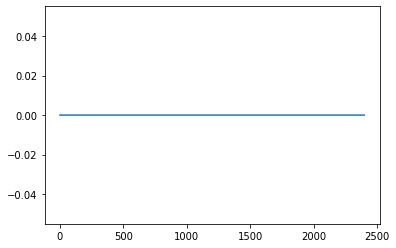

In [40]:

class Dataset(Dataset):
    def __init__(self, path):
        self.path = path
        if self.path[-1] != '/':
            self.path += '/'        
        self.df = pd.read_csv(self.path + 'segments.csv')
        self.NFFF = 200

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        sid = self.df.iloc[idx]['segment_id']
        target = self.df.iloc[idx]['category_id']
        data = sio.loadmat(self.path+'{}'.format(sid))['data']
        _,_, data = signal.spectrogram(data[0,:],fs=5000,nperseg=256,noverlap=128,nfft=1024)

        data = data[:self.NFFF,:]
        data = stats.zscore(data,axis=1)
        data = np.expand_dims(data,axis=0)
        return data,target
        
    def split_reviewer(self, reviewer_id):
        train = copy.deepcopy(self)
        valid = copy.deepcopy(self)

        idx = self.df['reviewer_id']!=reviewer_id

        train.df = train.df[idx].reset_index(drop=True)
        valid.df = valid.df[np.logical_not(idx)].reset_index(drop=True)
        return train, valid

